In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import datetime
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Input, LSTM
from keras.models import Sequential, Model,load_model
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Input, Convolution1D, MaxPooling1D, GlobalMaxPooling1D
import numpy as np
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
import datetime

Using TensorFlow backend.


In [2]:
final_data=pd.read_csv("final_data.csv")

### Model1

In [3]:
y1 = torch.tensor(final_data['unit_sales'].values.astype(np.float32))
X1 = torch.tensor(final_data.drop('unit_sales', axis = 1).values.astype(np.float32)) 
dataset1 = TensorDataset(X1,y1) 

In [4]:
del final_data

In [5]:
train_set1, val_set1 = torch.utils.data.random_split(dataset1, [1639252, 409813])
train_loader1 = DataLoader(dataset = train_set1, shuffle = True,batch_size=2048)

In [6]:
del X1,y1

In [7]:
validation_loader1=DataLoader(dataset = val_set1, shuffle = True,batch_size=409813)

In [8]:
for i,j in validation_loader1:
    X_test1,y_test1=i,j

In [9]:
class FirstNetwork_v1(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.lin1 = nn.Linear(40,20)
        self.lin2 = nn.Linear(20, 1)
    
    def forward(self, X):
        a1 = self.lin1(X) #computes the dot product and adds bias
        h1 = a1.relu()
        a2 = self.lin2(h1) #computes dot product and adds bias
        return a2

In [10]:
model1=FirstNetwork_v1()

In [11]:
criterion1 = nn.MSELoss()

training_loss_model1=[]
validation_loss_model1=[]

epochs = 50
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)

for epoch in range(epochs):
    training_loss_batch=[]
    validation_loss_batch=[]
    for X_train, y_train in train_loader1:
        optimizer1.zero_grad()
        output = model1(X_train)
        loss1 = criterion1(output, y_train.reshape(-1,1))
        loss1.backward()
        optimizer1.step()
        training_loss_batch.append(loss1.item())
        validation_loss_batch.append(criterion1(model1(X_test1),y_test1.reshape(-1,1)).item())
    validation_loss_model1.append(validation_loss_batch)
    training_loss_model1.append(training_loss_batch)
    if epoch%5==0:
        print(epoch)
        print("Training Loss:",np.mean(training_loss_batch))
        print("Validation Loss:",np.mean(validation_loss_batch))

0
Training Loss: 0.0005320578300656888
Validation Loss: 0.0005256896275363062
5
Training Loss: 0.00013915447530546835
Validation Loss: 0.00013956965450005613
10
Training Loss: 0.00010004982640170323
Validation Loss: 0.00010044593543855453
15
Training Loss: 8.405117861887024e-05
Validation Loss: 8.445404589397963e-05
20
Training Loss: 7.468759160994327e-05
Validation Loss: 7.505735617557415e-05
25
Training Loss: 6.841453004279755e-05
Validation Loss: 6.876093377488562e-05
30
Training Loss: 6.390920402628943e-05
Validation Loss: 6.424075409983077e-05
35
Training Loss: 6.0506707354426646e-05
Validation Loss: 6.083431419503402e-05
40
Training Loss: 5.785423224430285e-05
Validation Loss: 5.8163790672370166e-05
45
Training Loss: 5.570417066864389e-05
Validation Loss: 5.600441730617268e-05


In [12]:
for epoch in range(50,100):
    training_loss_batch=[]
    validation_loss_batch=[]
    for X_train, y_train in train_loader1:
        optimizer1.zero_grad()
        output = model1(X_train)
        loss1 = criterion1(output, y_train.reshape(-1,1))
        loss1.backward()
        optimizer1.step()
        training_loss_batch.append(loss1.item())
        validation_loss_batch.append(criterion1(model1(X_test1),y_test1.reshape(-1,1)).item())
    validation_loss_model1.append(validation_loss_batch)
    training_loss_model1.append(training_loss_batch)
    if epoch%5==0:
        print(epoch)
        print("Training Loss:",np.mean(training_loss_batch))
        print("Validation Loss:",np.mean(validation_loss_batch))

50
Training Loss: 5.390753712629802e-05
Validation Loss: 5.421442387450589e-05
55
Training Loss: 5.239720150221432e-05
Validation Loss: 5.2699016535537816e-05
60
Training Loss: 5.110699363994196e-05
Validation Loss: 5.139478138546528e-05
65
Training Loss: 4.996989205057126e-05
Validation Loss: 5.025475186354814e-05
70
Training Loss: 4.896256510658029e-05
Validation Loss: 4.92459087476068e-05
75
Training Loss: 4.808367674094951e-05
Validation Loss: 4.8343839819139606e-05
80
Training Loss: 4.724701032361228e-05
Validation Loss: 4.752867557789308e-05
85
Training Loss: 4.6507854180555986e-05
Validation Loss: 4.67868414804858e-05
90
Training Loss: 4.583722434159817e-05
Validation Loss: 4.6106479151214245e-05
95
Training Loss: 4.521425491359568e-05
Validation Loss: 4.5479077722602e-05


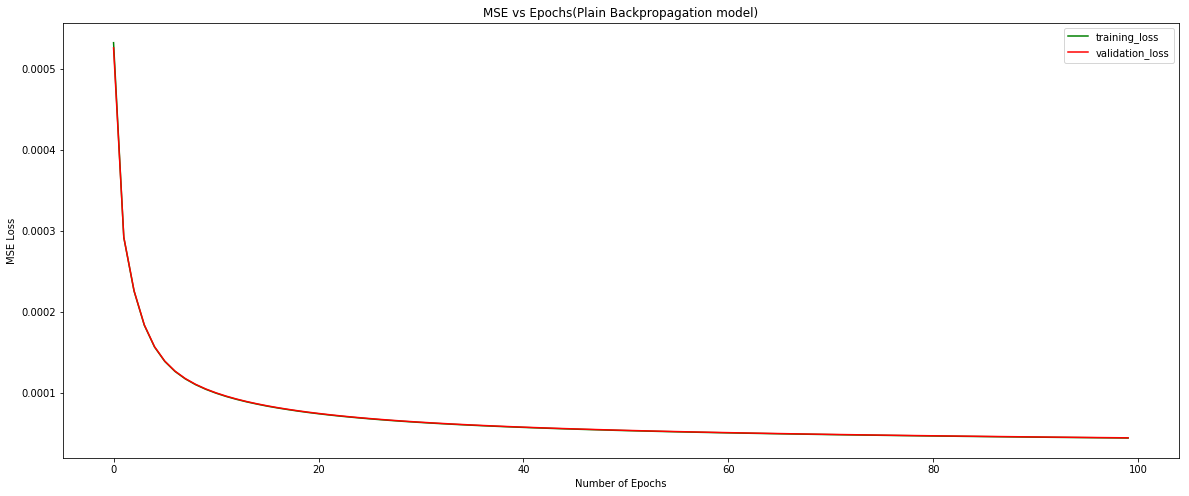

In [13]:
plt.figure(figsize=(20,8))
plt.plot(np.arange(len([np.mean(i) for i in training_loss_model1])),[np.mean(i) for i in training_loss_model1],'-g', label='training_loss')
plt.plot(np.arange(len([np.mean(i) for i in validation_loss_model1])),[np.mean(i) for i in validation_loss_model1],'-r', label='validation_loss')
plt.xlabel("Number of Epochs")
plt.ylabel("MSE Loss")
plt.title( "MSE vs Epochs(Plain Backpropagation model)")
plt.legend();

Skipping first 10 epochs


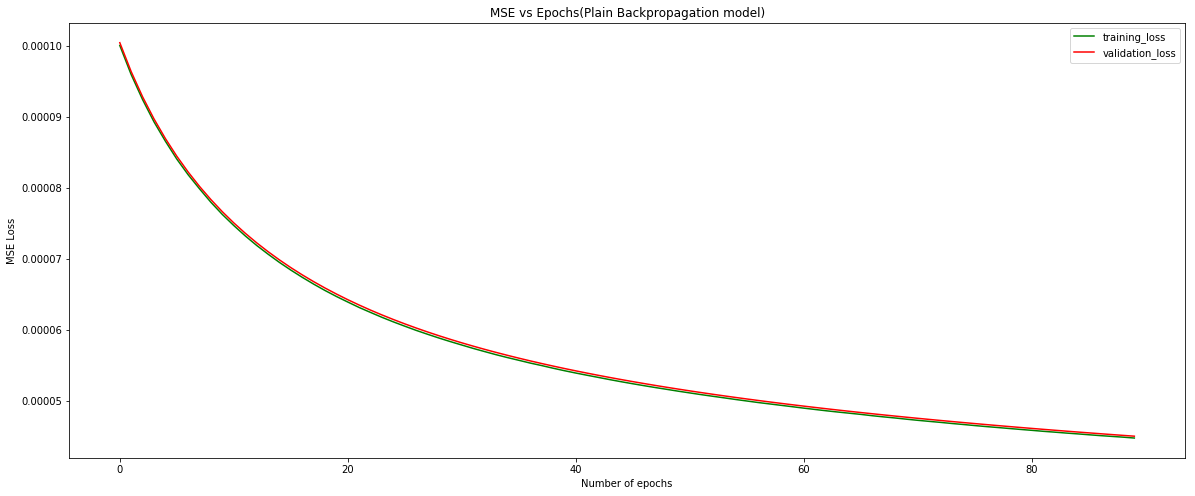

In [14]:
plt.figure(figsize=(20,8))
plt.plot(np.arange(len([np.mean(i) for i in training_loss_model1][10:])),[np.mean(i) for i in training_loss_model1][10:],'-g', label='training_loss')
plt.plot(np.arange(len([np.mean(i) for i in validation_loss_model1][10:])),[np.mean(i) for i in validation_loss_model1][10:],'-r', label='validation_loss')
plt.xlabel("Number of epochs")
plt.ylabel("MSE Loss")
plt.title( "MSE vs Epochs(Plain Backpropagation model)")
plt.legend();
print("Skipping first 10 epochs")

In [15]:
min(validation_loss_batch)

4.495335087995045e-05